# **DETECCIÓN DE LETRAS DEL ABECEDARIO DEL LENGUAJE DE SEÑAS COLOMBIANO (LSC)**

<img src="https://github.com/afxmejia02/DetectorLSC-ProyectoIA/raw/main/multimedia/Banner.png">


# **Problematica:**

Segun DANE en 2021 existian 459.784 personas sordas en el pais. Personas que tienen una clara dificultad en su comunicacion debido al bajo conocimineto colectivo de este lenguaje. Impidiendoles tener una vida normal como ir a la escuela. **Segun INSOR (Instituto Nacional para Sordos)** cifras del SIMAT con corte a marzo de 2019, se estima que aproximadamente **11%** de
las personas con discapacidad auditiva en edad escolar (entre 5 y 16 años) estarían matriculadas en algún colegio. Esta es una de tantas problematicas que pueden una persona con discapacidad en la comunicacion. Citas medicas, derecho a votar, derecho a opinar y mas, pueden ser batallas a las qeu se enfrentan diariamente.

**Dataset LSC Modelo**

El Dataset de Lenguaje de Señas Colombiano es una colección de imágenes que representa las letras del abecedario en el lenguaje de señas colombiano (LSC). Estas imágenes son una valiosa herramienta para el aprendizaje y la investigación en el campo de la comunicación inclusiva y la lengua de señas

Enlace del repositorio del dataset: https://www.kaggle.com/datasets/oscarstep/dataset-lsc-modelo

#**CREACION DEL DATASET**




In [25]:
#@title  **Cargamos el drive del proyecto**
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title **Letra que deseas añadir a tu data frame y el nombre del archivo csv de salida**

import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np
import pandas as pd
letra = "a" # @param {type:"string"}
archivo = "sign-language" #@param {type:"string"}
input_images_path = "/content/drive/MyDrive/AI_PROJECT/Lenguaje_Señas_Images/"+letra
files_names = os.listdir(input_images_path)
data = []


for file_name in files_names:
  image_path = input_images_path + "/" + file_name
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,(28,28))
  data.append(np.reshape(np.array(image),(28*28)))

columns = []
count = 0
for x in data[0]:
    count += 1
    columns.append("pixel" + str(count))


df = pd.DataFrame(data,columns=columns)
df["letra"] = letra
#@markdown Pon True si deseas guardar el header de tu data frame en tu csv
#@markdown (Recomendacion poner True solo la primera vez de ejecucion)
header = False # @param ["True", "False"] {type:"raw"}
df.to_csv("/content/drive/MyDrive/AI_PROJECT/"+archivo+".csv", index=False, mode="a", header=header)


##**EXPLORACION DE LOS DATOS**



In [1]:
#@title **Importamos todas las librerias a utilizar**

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/afxmejia02/DetectorLSC-ProyectoIA/main/data/sign-language.csv")
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,letra
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,a
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,a
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,a
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,a
4,0,0,0,0,0,0,0,0,0,0,...,8,3,0,0,0,0,0,0,0,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,y
4196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,y
4197,0,0,0,0,0,0,0,210,113,96,...,0,0,0,0,0,0,0,0,0,y
4198,0,0,0,0,0,0,0,0,0,0,...,0,2,6,5,8,10,12,20,35,y


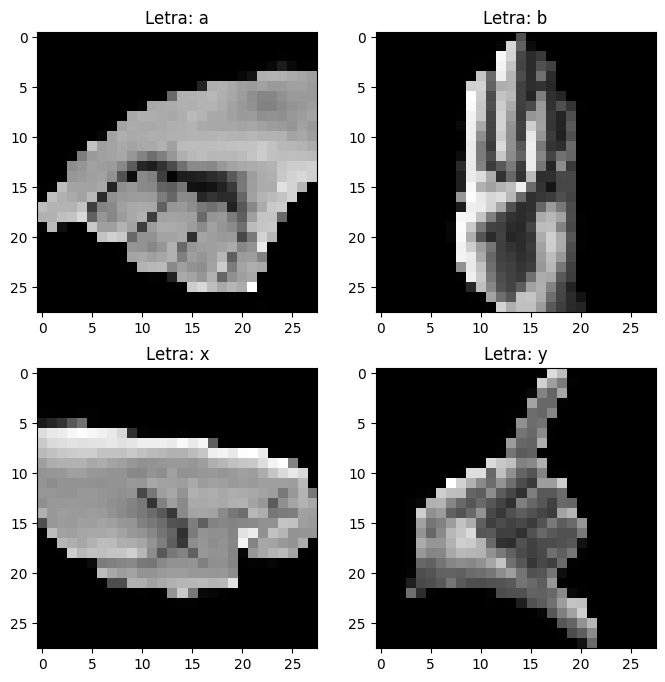

In [3]:
import numpy as np

letras_a = data[data["letra"] == "a"]
letras_b = data[data["letra"] == "b"]
letras_x = data[data["letra"] == "x"]
letras_y = data[data["letra"] == "y"]

array_a = letras_a.iloc[0,0:-1]
array_b = letras_b.iloc[0,0:-1]
array_x = letras_x.iloc[0,0:-1]
array_y = letras_y.iloc[0,0:-1]


dim = int(np.sqrt(array_a.shape[0]))
image_a = np.array(array_a, dtype="float").reshape(dim,dim)
image_b = np.array(array_b, dtype="float").reshape(dim,dim)
image_x = np.array(array_x, dtype="float").reshape(dim,dim)
image_y = np.array(array_y, dtype="float").reshape(dim,dim)

plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.imshow(image_a, cmap="gray");
plt.title("Letra: a")
plt.subplot(2,2,2)
plt.imshow(image_b, cmap="gray");
plt.title("Letra: b")
plt.subplot(2,2,3)
plt.imshow(image_x, cmap="gray");
plt.title("Letra: x")
plt.subplot(2,2,4)
plt.imshow(image_y, cmap="gray");
plt.title("Letra: y");

# **MACHINE LEARNING**

En esta fase entrenamos varios modelos de clasificación:

- GaussianNB
- SVC - rbf
- DecisionTreeClassifier
- RandomForestClassifier


In [4]:
X=data.values[:,:-1]
n=28
X = X.reshape(X.shape[0], -1).astype('float32')
y=data.values[:,-1]
map =  {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'i': 6, 'k': 7, 'l': 8, 'm':9,'n': 10, 'o': 11, 'p': 12, 'q': 13, 'r': 14, 't': 15, 'u': 16, 'v': 17, 'w': 18, 'x': 19, 'y': 20}
y = [map[letra] for letra in y]
print(X.shape)

(4200, 784)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=21)

p = Pipeline((("pca", PCA(n_components=32)), ("classifier", GaussianNB()) ))
p.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, p.predict(X_test)))
print("Precision:", precision_score(y_test, p.predict(X_test), average='macro'))

Accuracy: 0.39880952380952384
Precision: 0.39989808440727936


In [6]:
p = Pipeline((("pca", PCA(n_components=32)), ("classifier", SVC(kernel='rbf')) ))
p.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, p.predict(X_test)))
print("Precision:", precision_score(y_test, p.predict(X_test), average='macro'))

Accuracy: 0.6702380952380952
Precision: 0.6910216775828667


In [7]:
p = Pipeline((("pca", PCA(n_components=32)), ("classifier", DecisionTreeClassifier(max_depth=100)) ))
p.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, p.predict(X_test)))
print("Precision:", precision_score(y_test, p.predict(X_test), average='macro'))

Accuracy: 0.37023809523809526
Precision: 0.3672304595481305


In [8]:
p = Pipeline((("pca", PCA(n_components=32)), ("classifier", RandomForestClassifier(max_depth=100, n_estimators=352))))
p.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, p.predict(X_test)))
print("Precision:", precision_score(y_test, p.predict(X_test), average='macro'))

Accuracy: 0.7345238095238096
Precision: 0.7338487421106482


De los modelos anteriores el que obtuvo un mejor comportamiento bajo la métrica del accuracy fue RandomForestClassifier

# **DEEP LEARNING**

Para la implementacion de deep learning realizamos el preentrenamienti y el testeo del modelo con dos redes neuronales diferentes: una haciendo uso de PCA, y otra donde no y haciendo uso de redes neuronales convolucionales

Epoch 1/30
672/672 [==============================] - 8s 4ms/step - loss: 2.2644 - accuracy: 0.3024 - val_loss: 1.7416 - val_accuracy: 0.4357
Epoch 2/30
672/672 [==============================] - 2s 3ms/step - loss: 1.4102 - accuracy: 0.5423 - val_loss: 1.3389 - val_accuracy: 0.5833
Epoch 3/30
672/672 [==============================] - 2s 3ms/step - loss: 0.9799 - accuracy: 0.6830 - val_loss: 1.2470 - val_accuracy: 0.6095
Epoch 4/30
672/672 [==============================] - 2s 3ms/step - loss: 0.7293 - accuracy: 0.7592 - val_loss: 1.1792 - val_accuracy: 0.6524
Epoch 5/30
672/672 [==============================] - 2s 3ms/step - loss: 0.5532 - accuracy: 0.8199 - val_loss: 1.2820 - val_accuracy: 0.6512
Epoch 6/30
672/672 [==============================] - 3s 4ms/step - loss: 0.4110 - accuracy: 0.8735 - val_loss: 1.1659 - val_accuracy: 0.7000
Epoch 7/30
672/672 [==============================] - 3s 4ms/step - loss: 0.4015 - accuracy: 0.8705 - val_loss: 1.4548 - val_accuracy: 0.6488
Epoch 

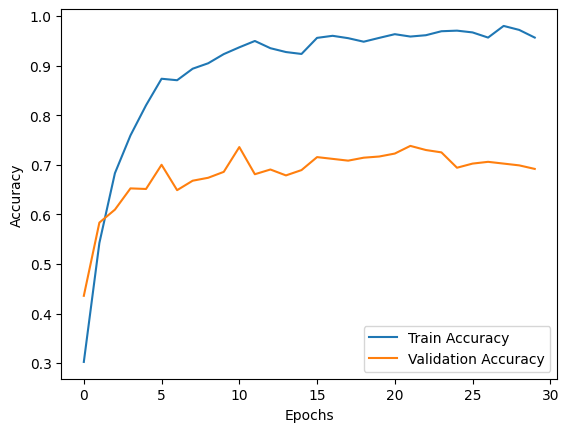

In [9]:
#@title Modelo de DNN con PCA


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=21)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = np.array(y_train, dtype=float)
y_test = np.array(y_test, dtype=float)

n_components=28
pca = PCA(n_components= n_components, whiten=True)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(n_components,), name="flatten_input"),
    tf.keras.layers.Dense(8192, activation="relu"),
    tf.keras.layers.Dense(len(list(np.unique(y_train))), activation="softmax"),
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=5,validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('PARA', n_components, 'COMPONENTES')
print('-----------------------------------------------------------------------------')

Epoch 1/30
210/210 [==============================] - 9s 13ms/step - loss: 2.5409 - accuracy: 0.1854 - val_loss: 1.9116 - val_accuracy: 0.3702
Epoch 2/30
210/210 [==============================] - 3s 12ms/step - loss: 1.6036 - accuracy: 0.4491 - val_loss: 1.4018 - val_accuracy: 0.5333
Epoch 3/30
210/210 [==============================] - 3s 14ms/step - loss: 1.1099 - accuracy: 0.6193 - val_loss: 1.2019 - val_accuracy: 0.5798
Epoch 4/30
210/210 [==============================] - 3s 13ms/step - loss: 0.8125 - accuracy: 0.7182 - val_loss: 1.0254 - val_accuracy: 0.6595
Epoch 5/30
210/210 [==============================] - 3s 12ms/step - loss: 0.5628 - accuracy: 0.8164 - val_loss: 0.9365 - val_accuracy: 0.7060
Epoch 6/30
210/210 [==============================] - 3s 12ms/step - loss: 0.4442 - accuracy: 0.8488 - val_loss: 0.9240 - val_accuracy: 0.7024
Epoch 7/30
210/210 [==============================] - 3s 12ms/step - loss: 0.3122 - accuracy: 0.8938 - val_loss: 0.8375 - val_accuracy: 0.7488

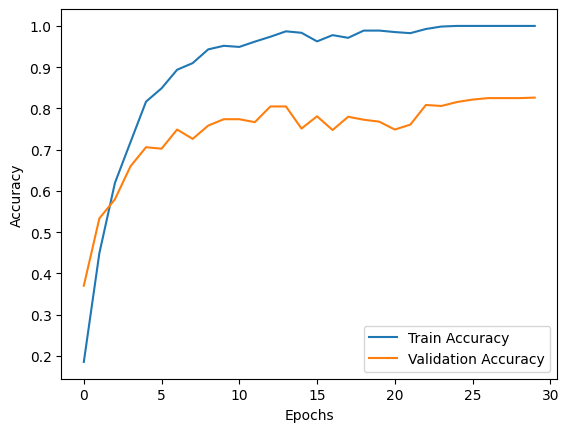

In [10]:
#@title Modelo de DNN sin PCA y usando redes convolucionales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=21)

X_train = X_train.reshape([-1,n,n, 1])
X_test = X_test.reshape([-1,n,n, 1])

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = np.array(y_train, dtype=float)
y_test = np.array(y_test, dtype=float)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (2, 2), padding="same", input_shape=(n,n,1) , activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16384, activation="relu"),
    tf.keras.layers.Dense(len(list(np.unique(y))), activation="softmax"),
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=16,validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

**Resultados obtenidos:** Luego de comparar la exactitud obtenemos que
la red nueronal convolucional aporta una mayor exactitud que el primer modelo hecho con PCA. Para ambos modelos se presenta un sobreentrenamiento

#**PREDICCION DEL MODELO**

27/27 [==============================] - 0s 3ms/step


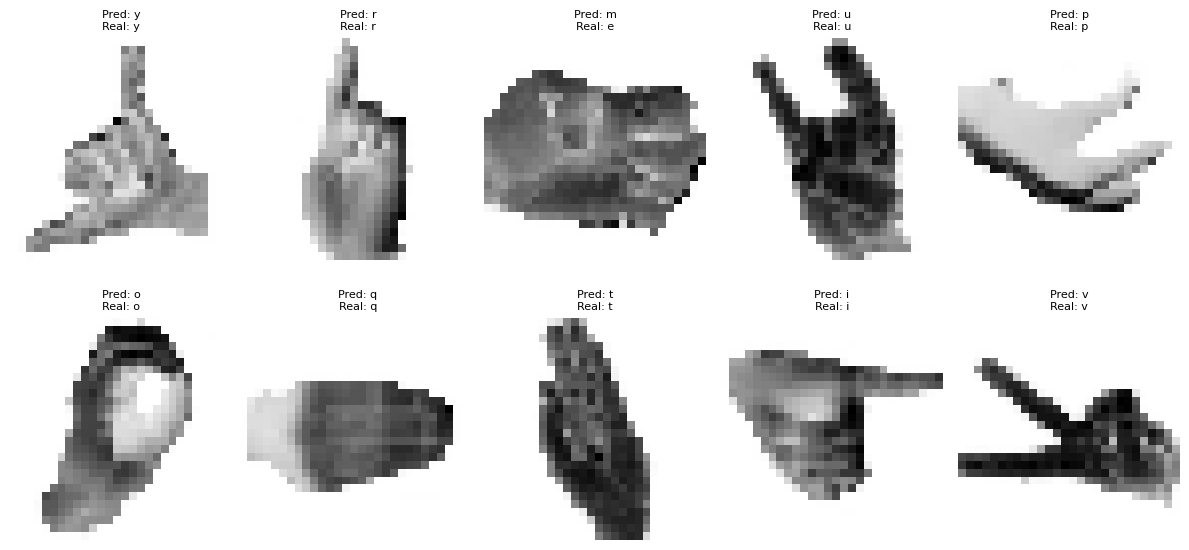

In [11]:
#@title **Prediciones para 10 letras aleatorias**

import matplotlib.pyplot as plt
predictions = model.predict(X_test)
label_to_text = {v: k for k, v in map.items()}

num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i in range(num_rows):
    for j in range(num_cols):
        index = np.random.randint(0, len(X_test))
        axes[i, j].imshow(X_test[index].reshape(n, n), cmap='Greys')
        axes[i, j].axis('off')

        predicted_label = label_to_text[np.argmax(predictions[index])]
        real_label = label_to_text[int(y_test[index])]
        axes[i, j].set_title(f'Pred: {predicted_label}\nReal: {real_label}', fontsize=8)

plt.tight_layout()
plt.show()

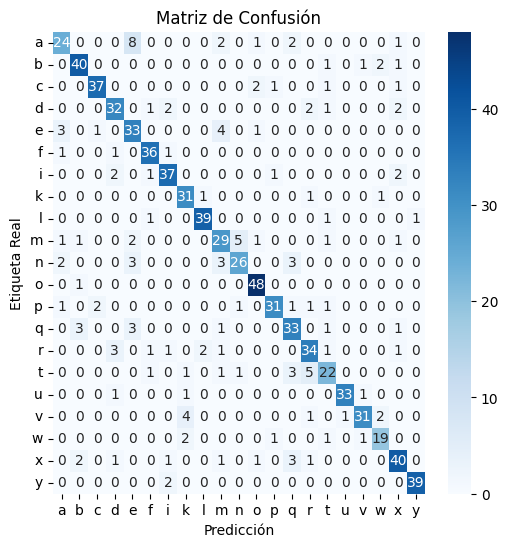

In [12]:
#@title **Matriz de confusion de las predicciones realizadas**
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 't', 'u', 'v', 'w', 'x', 'y']
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(y_test, labels_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.yticks(rotation=0)
plt.xlabel('Predicción')
plt.show()

#**K - means**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=21)
kmeans = KMeans(n_clusters=20)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

#**KMEANS**

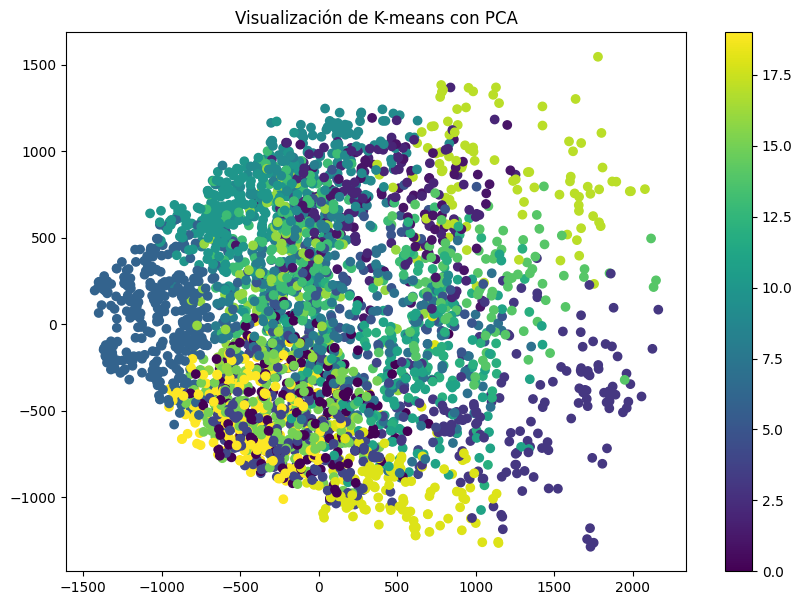

In [14]:
#@title **Visualización de la disposición de dos características, coloreando los valores de los grupos seleccionados**
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

y_train_pred = kmeans.predict(X_train)

plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, cmap='viridis')

plt.title('Visualización de K-means con PCA')
plt.colorbar()
plt.show()

# **VISUALIZACIÓN CON PCA Y TSNE**

In [15]:
import plotly.express as px
pca_senas = PCA(n_components= 3, whiten=True)
X_pca = pca_senas.fit_transform(X)


fig = px.scatter_3d(x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2], color=y)
fig.show()

In [16]:
pca_senas = PCA(n_components= 4, whiten=True)
X_pca = pca_senas.fit_transform(X)


fig = px.scatter_3d(x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2], color=y, size=np.abs(X_pca[:,3]))
fig.show()

In [17]:
from sklearn.manifold import TSNE
tsne_senas = TSNE(n_components=3, learning_rate="auto")
X_senas = tsne_senas.fit_transform(X)
fig = px.scatter_3d(x=X_senas[:,0], y=X_senas[:,1], z=X_senas[:,2], color=y)
fig.show()

#**EJECUCION**

In [18]:
from google.colab.patches import cv2_imshow

letra=label_to_text

cap= cv2.VideoCapture("VideoTest.mp4") #"/content/drive/MyDrive/AI_PROJECT/multimedia/VideoTest.mp4"

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error al leer el fotograma.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [max_contour], 0, 255, thickness=cv2.FILLED)
    hand = cv2.bitwise_and(frame, frame, mask=mask)
    img = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))
    img = img.reshape((1, 28, 28, 1)).astype('float32') / 255.0
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    predicted_letter = letra[predicted_class]
    confidence = predictions[0][predicted_class]
    text = f'Letra: {predicted_letter}, Confianza: {confidence:.2f}'
    cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()






Error al leer el fotograma.


El proceso de ejecucion se tuvo que realizar en maquina local, debido a las limitaciones que presenta Collab y las limitaciones que presenta git para subir archi

En la carpeta "multimedia" del repositorio esta disponible el video con los resultados obtenidos

#**APLICACION DE ALGORITMOS GENETICOS EN EL MODELO**

En algunas imagenes del dataset se pueden tener imagenes un poco distorcionadas, lo que podriá llegar a afectar la predicción del modelo que entrenemos esto pueda ser resuelto utilizando una estrategia de algoritmos genéticos para generar imagenes de mejor calidad.

Estrategia que utilizamos:

1. Escogimos imagenes del dataset original aleatoriamente
2. Cruzamos estas imagenes y utilizamos como medida de calidad el MSE(mean_squared_error).
3. Agregamos la mutuación para que cambiarán las soluciones y seleccionamos las mejores.

Y con esto obtuvimos una imagen distorcionada a partir del anterior procedimiento que se intenta asemejar a la representacion de una letra.

In [19]:
def v_solution(n_soluciones):

  v_soluciones = []

  for j in range(n_soluciones):
    sol = np.zeros(28*28)
    for i in range(n_soluciones):
      sol[i] = np.random.randint(0,255)

    v_soluciones.append(sol)

  return v_soluciones


In [20]:
def cost_MSE(letra, solucion):
  from sklearn.metrics import mean_squared_error
  MSE = mean_squared_error(letra,solucion)
  return MSE

In [21]:
def TSP_cross_over(solution1, solution2):
    l = len(solution1)
    cstart = np.random.randint(l)
    cend   = np.random.randint(l-cstart)+cstart+1
    r = np.zeros(l)
    s1part = solution1[cstart:cend]
    r[cstart:cend] = s1part
    c = cend
    for i in range(l):
        if not solution2[i] in s1part:
            if c >= l:
                c = 0
            r[c] = solution2[i]
            c += 1
    return r

In [22]:
def TSP_mutate(solution, mutation_prob):
    mutated_solution = np.copy(solution)
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            j = i+1 if i!=len(solution)-1 else 0
            tmp = mutated_solution[i]
            mutated_solution[i] = mutated_solution[j]
            mutated_solution[j] = tmp
    return mutated_solution

In [23]:
def TSP_plot_GA_result(best, bests, means, stds):
    import pandas as pd
    data = pd.read_csv("https://raw.githubusercontent.com/afxmejia02/DetectorLSC-ProyectoIA/main/data/sign-language.csv")
    A=data[data['letra'] == 'a'].values[:,:-1]
    n=28

    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(131)
    plot_evolution(bests, means, stds)
    fig.add_subplot(132)
    best = best.reshape(n,n)
    plt.imshow(best,cmap='gray')
    fig.add_subplot(133)
    A = A.astype('float32')
    plt.imshow(cv2.resize(A[0].reshape(28,28), (n, n)),cmap='gray')

In [26]:
#@title  **code** GAs implementation
%%writefile /content/drive/MyDrive/course-AI/ai-uis-student/code/ga.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()


def run_ga(pop_size, init_population_function,
           mutation_function, crossover_function, cost_function,
           crossover_prob, mutation_prob, n_iters):

    pop = init_population_function(pop_size)
    n_xover_indivs = int(pop_size * crossover_prob)

    means = []
    stds  = []
    best_costs = []
    best = None

    for i in tqdm(range(n_iters)):

        #if i%(n_iters/10)==0:
        # print i

        # do cross over
        offsprings = []
        permut_temp = np.random.permutation(len(pop))
        idx_xover_indivs = permut_temp[n_xover_indivs:]
        #print "permut_temp: ", permut_temp
        #print "idx_xover_indivs: ", idx_xover_indivs
        for idx in idx_xover_indivs:
            idx_counterpart = np.random.randint(len(pop))
            i1 = pop[idx]
            i2 = pop[idx_counterpart]
            offs = crossover_function(i1,i2)
            offsprings.append(offs)
        offsprings = np.array(offsprings)

        pop = np.vstack((pop, offsprings)).astype(int)

        # mutate population
        for j in range(len(pop)):
            pop[j] = mutation_function(pop[j], mutation_prob)

        # select best to maintain pop_size fixed
        costs = np.array([cost_function(j) for j in pop])
        top_idxs  = np.argsort(costs)[:pop_size]
        pop = pop[top_idxs]

        costs = costs[top_idxs]

        means.append(np.mean(costs))
        stds.append(np.std(costs))
        best_costs.append(np.min(costs))

        if best is None or np.min(costs) < cost_function(best):
             best = pop[np.argmin(costs)]

    means      = np.array(means)
    stds       = np.array(stds)
    best_costs = np.array(best_costs)


    return best, best_costs, means, stds

Overwriting /content/drive/MyDrive/course-AI/ai-uis-student/code/ga.py


  0%|          | 0/500 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

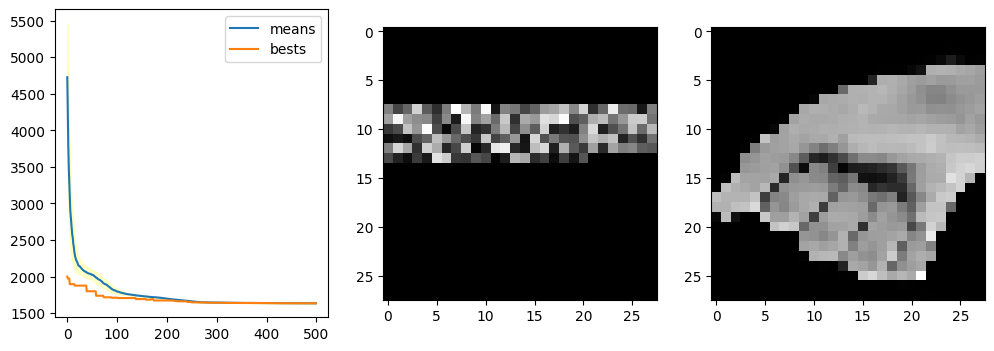

In [27]:
%run /content/drive/MyDrive/course-AI/ai-uis-student/code/ga.py

A=data[data['letra'] == 'a'].values[:,:-1]
n=28
A = A.reshape(200, 784).astype('float32')
new_A = np.zeros((len(A), n, n), dtype='float32')
for i, image in enumerate(A):
  new_A[i] = cv2.resize(image, (n, n))
A=new_A.reshape(200,n*n)
A=A.astype(int)

r =  run_ga(pop_size=100,
               init_population_function = lambda x: v_solution(x),
               mutation_function        = TSP_mutate,
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: cost_MSE(A[1], x),
               crossover_prob           = 0.08,
               mutation_prob            = 0.01,
               n_iters                  = 500)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

In [ ]:
#@title **Letras Generadas con algoritmos genéticos**

letras = ['a', 'b', 'c', 'd', 'e', 'f', 'i', 'k', 'l', 'm', 'n']
n_soluciones = 100  # Genera más soluciones
n_mejores = 50  # Selecciona las 50 mejores
dataset = []

for letra in letras:
    A=data[data['letra'] == letra].values[:,:-1]
    A = A.reshape(200, 100, 100).astype('float32')
    new_A = np.zeros((len(A), n, n), dtype='float32')
    for i, image in enumerate(A):
        new_A[i] = cv2.resize(image, (n, n))
    A=new_A.reshape(200,n*n)
    A=A.astype(int)

    soluciones = v_solution(n_soluciones)
    costos = []
    for i in range(n_soluciones):
        soluciones[i] = TSP_mutate(soluciones[i], 0.01)
        for j in range(n_soluciones):
            if i != j:
                soluciones[i] = TSP_cross_over(soluciones[i], soluciones[j])
        costos.append(cost_MSE(A[1], soluciones[i]))

    # Selecciona las 50 mejores soluciones
    mejores_indices = np.argsort(costos)[:n_mejores]
    mejores_soluciones = [soluciones[i] for i in mejores_indices]

    for solucion in mejores_soluciones:
        fila = list(map(int, solucion)) + [letra]  # Convierte los valores de los píxeles a enteros
        dataset.append(fila)

# Crea los nombres de las columnas
columnas = [f'pixel{i+1}' for i in range(n*n)] + ['letra']

# Crea el DataFrame y guarda el conjunto de datos en un archivo .csv
df = pd.DataFrame(dataset, columns=columnas)
df.to_csv('/content/drive/MyDrive/Letras-generadas/dataset.csv', index=False)


Para las demás letras o, p, q, r, t, u, v, w, x, y


In [ ]:
columns = []

newdataset = np.array(newdataset)
count = 0
for x in newdataset[0,:-1]:
    count += 1
    columns.append("pixel" + str(count))

columns.append("letra")

In [ ]:
nuevoDataset = pd.DataFrame(newdataset, columns=columns)

In [ ]:
nuevoDataset.to_csv("/content/drive/MyDrive/AI_PROJECT/nuevoDataset_28_28.csv", index=False, mode="a", header=True)

(5250, 784)
Epoch 1/30
263/263 [==============================] - 5s 14ms/step - loss: 2.5109 - accuracy: 0.2202 - val_loss: 1.9841 - val_accuracy: 0.3867
Epoch 2/30
263/263 [==============================] - 4s 14ms/step - loss: 1.5516 - accuracy: 0.4933 - val_loss: 1.4313 - val_accuracy: 0.5400
Epoch 3/30
263/263 [==============================] - 4s 14ms/step - loss: 1.1002 - accuracy: 0.6302 - val_loss: 1.2486 - val_accuracy: 0.5914
Epoch 4/30
263/263 [==============================] - 3s 13ms/step - loss: 0.8027 - accuracy: 0.7352 - val_loss: 1.0854 - val_accuracy: 0.6467
Epoch 5/30
263/263 [==============================] - 3s 13ms/step - loss: 0.5845 - accuracy: 0.8071 - val_loss: 1.0524 - val_accuracy: 0.6886
Epoch 6/30
263/263 [==============================] - 4s 14ms/step - loss: 0.4084 - accuracy: 0.8586 - val_loss: 1.1032 - val_accuracy: 0.6800
Epoch 7/30
263/263 [==============================] - 4s 14ms/step - loss: 0.3046 - accuracy: 0.8986 - val_loss: 1.1372 - val_accu

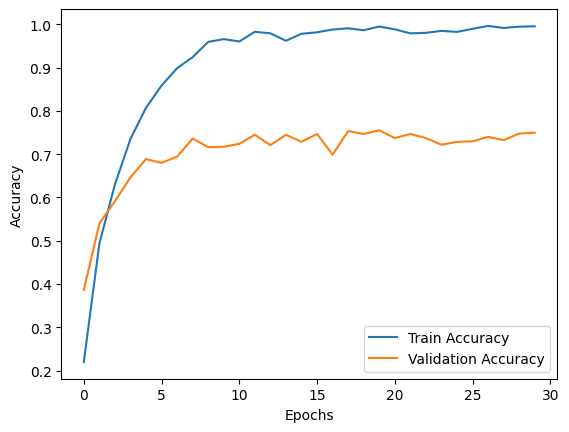

In [28]:
#@title **Unimos esos datos con el dataset original para obtener un nuevo dataset
data = pd.read_csv("/content/drive/MyDrive/AI_PROJECT/data/sign-language-genetic.csv",index_col=[0])
data

X=data.values[:,:-1]
n=28
X = X.reshape(X.shape[0], -1).astype('float32')
y=data.values[:,-1]
map =  {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'i': 6, 'k': 7, 'l': 8, 'm':9,'n': 10, 'o': 11, 'p': 12, 'q': 13, 'r': 14, 't': 15, 'u': 16, 'v': 17, 'w': 18, 'x': 19, 'y': 20}
y = [map[letra] for letra in y]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=21)

X_train = X_train.reshape([-1,n,n, 1])
X_test = X_test.reshape([-1,n,n, 1])

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = np.array(y_train, dtype=float)
y_test = np.array(y_test, dtype=float)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (2, 2), padding="same", input_shape=(n,n,1) , activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16384, activation="relu"),
    tf.keras.layers.Dense(len(list(np.unique(y))), activation="softmax"),
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=16,validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


33/33 [==============================] - 0s 3ms/step


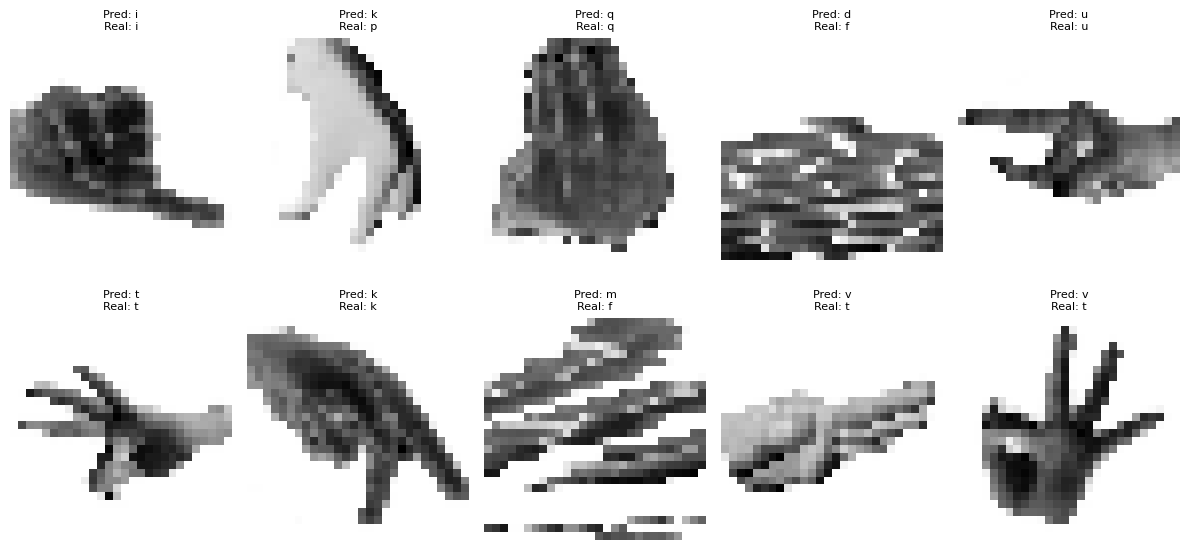

In [32]:
#@title **Prediciones para 10 letras aleatorias**

import matplotlib.pyplot as plt
predictions = model.predict(X_test)
label_to_text = {v: k for k, v in map.items()}

num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i in range(num_rows):
    for j in range(num_cols):
        index = np.random.randint(0, len(X_test))
        axes[i, j].imshow(X_test[index].reshape(n, n), cmap='Greys')
        axes[i, j].axis('off')

        predicted_label = label_to_text[np.argmax(predictions[index])]
        real_label = label_to_text[int(y_test[index])]
        axes[i, j].set_title(f'Pred: {predicted_label}\nReal: {real_label}', fontsize=8)

plt.tight_layout()
plt.show()